## DataFrame对象的创建
### 通过二维数组创建

In [1]:
import pandas as pd
data = [[110,105,99],[105,88,115],[109,120,130]]
columns = ['语文','数学','英语']
df = pd.DataFrame(data=data,columns=columns) #通过二维数组创建
print(df)

    语文   数学   英语
0  110  105   99
1  105   88  115
2  109  120  130


### 通过字典创建

In [2]:
import pandas as pd
df = pd.DataFrame({
    '语文':[110,105,99],
     '数学':[105,88,115],
     '英语':[109,120,130],
      '班级':'高一7班'
},index=[0,1,2]) #通过字典创建
print(df)

    语文   数学   英语    班级
0  110  105  109  高一7班
1  105   88  120  高一7班
2   99  115  130  高一7班


### 两种结构互相转换    
Series 到 DataFrame


In [3]:
import pandas as pd
d = {"语文": 78, "数学": 89, "英语": 95}
s = pd.Series(d)
s.head()

df = pd.DataFrame({"学科": s.index, "分数": s.values})
df.head()

,学科,分数
0,语文,78
1,数学,89
2,英语,95


DataFrame 到 Series

In [4]:
l = [[78, 89, 95], [65, 84, 100]]
df = pd.DataFrame(l, index=["小明", "小红"], columns=["语文", "数学", "英语"])
df.head()
print(df["数学"])
print(type(df["数学"]))
# # 如果选择多列的话，则还是一个 DataFrame
# print(type(df[["数学", "语文"]]))
# df[["数学", "语文"]]

小明    89
小红    84
Name: 数学, dtype: int64
<class 'pandas.core.series.Series'>


##  DataFrame创建练习题
1. 使用二维数组创建一个DataFrame，表示学生的考试成绩表。然后计算平均分、最高分和最低分。  

| Math | English | Science |
|------|---------|---------|
|  90  |   85    |   78    |
|  92  |   88    |   75    |
|  68  |   72    |   85    |


In [6]:
import pandas as pd

data = [
    [90, 85, 78],
    [92, 88, 75],
    [68, 72, 85]
]

df = pd.DataFrame(data, columns=["Math", "English", "Science"])

average_scores = df.mean()
highest_scores = df.max()
lowest_scores = df.min()

print("平均分:")
print(average_scores)

print("\n最高分:")
print(highest_scores)

print("\n最低分:")
print(lowest_scores)


平均分:
Math       83.333333
English    81.666667
Science    79.333333
dtype: float64

最高分:
Math       92
English    88
Science    85
dtype: int64

最低分:
Math       68
English    72
Science    75
dtype: int64


2. 使用由字典构成的字典创建一个DataFrame，包括学生的姓名、年龄和成绩。然后找出年龄最大和最小的学生。

|   Name  |  Age  | Math_Score |
|---------|-------|------------|
|  Alice  |   18  |     90     |
|    Bob  |   19  |     85     |
|  Carol  |   20  |     78     |


In [7]:
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Carol"],
    "Age": [18, 19, 20],
    "Math_Score": [90, 85, 78]
}

df = pd.DataFrame(data)

max_age_student = df[df["Age"] == df["Age"].max()]
min_age_student = df[df["Age"] == df["Age"].min()]

print("年龄最大的学生:")
print(max_age_student)

print("\n年龄最小的学生:")
print(min_age_student)


年龄最大的学生:
    Name  Age  Math_Score
2  Carol   20          78

年龄最小的学生:
    Name  Age  Math_Score
0  Alice   18          90


3. 使用一维数组和列表创建一个DataFrame，表示某个城市一周的每日温度。然后计算一周的平均温度。

|   Day  | Temperature |
|--------|-------------|
|  Mon   |     28      |
|  Tue   |     30      |
|  Wed   |     29      |
|  Thu   |     31      |
|  Fri   |     32      |
|  Sat   |     33      |
|  Sun   |     30      |


In [3]:
import pandas as pd

temperatures = [28, 30, 29, 31, 32, 33, 30]

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

df = pd.DataFrame({"Day": days, "Temperature": temperatures})

average_temperature = df["Temperature"].mean()

print("一周的平均温度:", average_temperature)


一周的平均温度: 30.428571428571427


4. 使用由Series构成的字典创建一个DataFrame，表示不同城市的每月降雨量和平均温度。然后找出每个城市的最湿和最干燥的月份。

|   City   |   Jan   |   Feb   |   Mar   |   Apr   |   May   |
|----------|---------|---------|---------|---------|---------|
|   City1  |   45    |   55    |   60    |   70    |   80    |
|   City2  |   35    |   40    |   45    |   50    |   55    |


In [4]:
import pandas as pd

data = {
    "City": ["City1", "City2"],
    "Jan": [45, 35],
    "Feb": [55, 40],
    "Mar": [60, 45],
    "Apr": [70, 50],
    "May": [80, 55]
}

df = pd.DataFrame(data)

df["Wettest_Month"] = df.iloc[:, 1:].idxmax(axis=1)
df["Driest_Month"] = df.iloc[:, 1:].idxmin(axis=1)

print("城市降雨最多的月份:")
print(df[["City", "Wettest_Month"]])

print("\n城市降雨最少的月份:")
print(df[["City", "Driest_Month"]])


City1 最湿的月份: May
City1 最干燥的月份: Jan
City2 最湿的月份: May
City2 最干燥的月份: Jan


5. 使用元组构成的列表创建一个DataFrame，表示不同产品的销售记录。然后计算每个产品的总销售额。

| Product_ID | Product_Name | Sales |
|------------|--------------|-------|
|    101     |  Product A  |  500  |
|    102     |  Product B  |  750  |
|    103     |  Product A  |  600  |
|    104     |  Product C  |  450  |


In [11]:
import pandas as pd

sales_data = [
    (101, "Product A", 500),
    (102, "Product B", 750),
    (103, "Product A", 600),
    (104, "Product C", 450)
]

df = pd.DataFrame(sales_data, columns=["Product_ID", "Product_Name", "Sales"])

total_sales_per_product = df.groupby("Product_Name")["Sales"].sum().reset_index()

total_sales_per_product.columns = ["Product_Name", "Total_Sales"]

print(total_sales_per_product)


  Product_Name  Total_Sales
0    Product A         1100
1    Product B          750
2    Product C          450


6. 使用字典构成的元组创建一个DataFrame，包括城市名称、人口和面积。然后计算人口密度，并找出人口密度最高的城市。

|   City       | Population  | Area (sq. km) |
|--------------|-------------|---------------|
|   New York   |   8500000   |    468.9      |
|  Los Angeles |   4000000   |    469.1      |
|   Chicago    |   2700000   |    227.6      |


In [9]:
import pandas as pd

city_data = [
    {"City": "New York", "Population": 8500000, "Area (sq. km)": 468.9},
    {"City": "Los Angeles", "Population": 4000000, "Area (sq. km)": 469.1},
    {"City": "Chicago", "Population": 2700000, "Area (sq. km)": 227.6}
]

df = pd.DataFrame(city_data)

df["Population Density"] = df["Population"] / df["Area (sq. km)"]

most_densely_populated_city = df[df["Population Density"] == df["Population Density"].max()]

print("人口密度最高的城市:")
print(most_densely_populated_city)


人口密度最高的城市:
       City  Population  Area (sq. km)  Population Density
0  New York     8500000          468.9        18127.532523


7. 使用Series和字典创建一个DataFrame，表示不同员工的工作经验和薪水。然后计算平均工资和平均工作经验。

|   Employee | Experience (years) | Salary |
|------------|---------------------|--------|
|   Alice    |         2           | 60000  |
|     Bob    |         5           | 75000  |
|   Carol    |         3           | 65000  |
|    David   |         7           | 80000  |
|     Eva    |         1           | 55000  |


In [8]:
import pandas as pd

employee_data = {
    "Employee": ["Alice", "Bob", "Carol", "David", "Eva"],
    "Experience (years)": [2, 5, 3, 7, 1],
    "Salary": [60000, 75000, 65000, 80000, 55000]
}

experience_series = pd.Series(employee_data["Experience (years)"])
salary_series = pd.Series(employee_data["Salary"])

df = pd.DataFrame({"Employee": employee_data["Employee"], "Experience (years)": experience_series, "Salary": salary_series})

average_salary = df["Salary"].mean()
average_experience = df["Experience (years)"].mean()

print("平均工资:", average_salary)
print("平均工作经验:", average_experience)


平均工资: 67000.0
平均工作经验: 3.6


## 小试牛刀
以下面表格的数据创建dataframe对象并获取行列索引和某个值
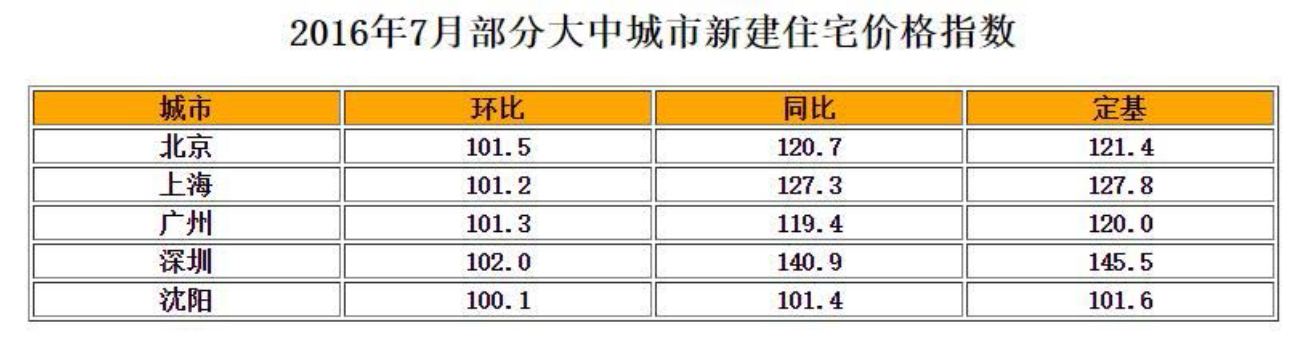

In [1]:
import pandas as pd

data = {
    "城市": ["北京", "上海", "广州", "深圳", "沈阳"],
    "环比": [101.5, 101.2, 101.3, 102.0, 100.1],
    "同比": [120.7, 127.3, 119.4, 140.9, 101.4],
    "定基": [121.4, 127.8, 120.0, 145.5, 101.6]
}

df = pd.DataFrame(data)

row_index = df.index

column_index = df.columns

value = df.at[1, "同比"]

print("行索引:")
print(row_index)

print("\n列索引:")
print(column_index)

print("\n第二行第三列的值:")
print(value)


行索引:
RangeIndex(start=0, stop=5, step=1)

列索引:
Index(['城市', '环比', '同比', '定基'], dtype='object')

第二行第三列的值:
127.3


In [3]:
print(df.loc[:,['语文','数学']])
print(df.iloc[:,[0,1]])
print(df.loc[:,'语文':])
print(df.iloc[:,:2])

NameError: name 'df' is not defined